In [2]:
%pylab inline
from pandas import read_csv, read_excel, concat
from subglacial_channel.simple_conduit_moulin_model import simple_sim


Populating the interactive namespace from numpy and matplotlib


In [3]:
#Read in moulin data
jeme_mou = read_csv('/home/mcoving/github/GrIS/X_PYTHON-CODES/data_csv/JEME17_MOU_1.csv', index_col=0, parse_dates=True)
jeme_str = read_csv('/home/mcoving/github/GrIS/X_PYTHON-CODES/data_csv/JEME17_STR_1.csv', index_col=0, parse_dates=True)

radi_mou = read_csv('/home/mcoving/github/GrIS/X_PYTHON-CODES/data_csv/RADI17_MOU_1.csv', index_col=0, parse_dates=True)
radi_str = read_csv('/home/mcoving/github/GrIS/X_PYTHON-CODES/data_csv/RADI17_STR_1.csv', index_col=0, parse_dates=True)

#foxx_mou = read_excel('../../W_Other_Data/Andrews2014_Data/nature13796-f2.xlsx', 'Fig_2_2011_Data_Panels_A_C_E', index_col=0)
#mou4_mou = read_excel('../../W_Other_Data/Andrews2014_Data/nature13796-f2.xlsx', 'Fig_2_2012_Data_Panels_B_D_F', index_col=1)


#pira_mou = read_csv('../../X_PYTHON-CODES/data_csv/PIRA18_HYD_1.csv', index_col=0, parse_dates=True)


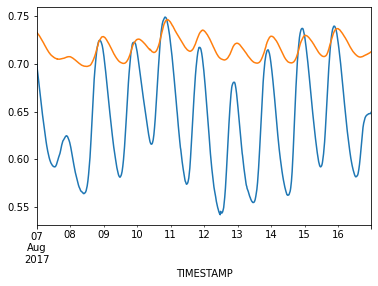

In [4]:
jeme_mou.water_level_above_bed_fob['8-7-2017':'8-16-2017'].plot()
radi_mou.water_level_above_bed_fob['8-7-2017':'8-16-2017'].plot()
jeme_mou.water_level_above_bed_fob['8-7-2017':'8-16-2017'].to_csv('jeme.csv')
radi_mou.water_level_above_bed_fob['8-7-2017':'8-16-2017'].to_csv('radi.csv')

mean jeme = 0.6444496529546818
max jeme = 0.7488981053699612
min jeme = 0.5420692854866439
mean radi = 0.7156524434982424
max radi = 0.7343606410743386
min radi = 0.702450896303285


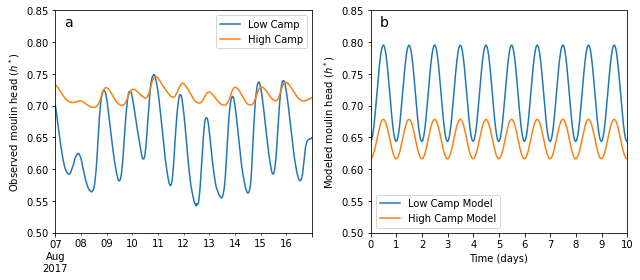

In [16]:
#subplots(1,2)
figure(figsize=(9,4))
subplot(121)

jeme_mou.water_level_above_bed_fob['8-7-2017':'8-16-2017'].plot()
radi_mou.water_level_above_bed_fob['8-7-2017':'8-16-2017'].plot()
ylim([0.5,0.85])
ylabel('Observed moulin head ($h^*$)')
xlabel('')
ax = gca()
text(0.035,0.93, 'a', fontsize=14, transform=ax.transAxes)

legend(['Low Camp','High Camp'])
#Calculate equil 
print("mean jeme =",mean(jeme_mou.water_level_above_bed_fob['8-9-2017':'8-16-2017']))
print("max jeme =",max(jeme_mou.water_level_above_bed_fob['8-9-2017':'8-16-2017']))
print("min jeme =",min(jeme_mou.water_level_above_bed_fob['8-9-2017':'8-16-2017']))

print("mean radi =",mean(radi_mou.water_level_above_bed_fob['8-3-2017':'8-7-2017']))
print("max radi =",max(radi_mou.water_level_above_bed_fob['8-3-2017':'8-7-2017']))
print("min radi =",min(radi_mou.water_level_above_bed_fob['8-3-2017':'8-7-2017']))


#figure()
sim_params = {'R_func':'sin',
              'A':3e-24, 
              'overflow':True, 
              'f':0.1,
              'A_R':100,
              'R_mean':0.3,
              'R_min':0.05,
              'L':25000.
             }
low_sim = simple_sim(camp='low', params=sim_params)
low_sim.run(run_params={'method':'LSODA','rtol':1e-8, 'atol':1e-8, 't_f':100})


sim_params = {'R_func':'sin',
              'A':3e-24, 
              'overflow':True, 
              'f':0.1,
              'A_R':1500,
              'R_mean':5.1,
              'R_min':3.0,
              'L':15000.
             }
high_sim = simple_sim(camp='high', params=sim_params)
high_sim.run(run_params={'t_f':100 ,'method':'LSODA','rtol':1e-8, 'atol':1e-8})

subplot(122)
secs_per_day = 60*60*24
low_t = low_sim.sol.t*low_sim.tau_res/secs_per_day - 120
plot(low_t, low_sim.sol.y[0])
high_t = high_sim.sol.t*high_sim.tau_res/secs_per_day - 120
plot(high_t, high_sim.sol.y[0])

legend(['Low Camp Model','High Camp Model'])

xlim([0,10])
ylim([0.5,0.85])
ylabel('Modeled moulin head ($h^*$)')
xlabel('Time (days)')
ax = gca()
ax.xaxis.set_ticks([0,1,2,3,4,5,6,7,8,9,10])
text(0.035,0.93, 'b', fontsize=14, transform=ax.transAxes)
tight_layout()
savefig('Moulin-head-variations.png',dpi=300)


(80.0, 90.0)

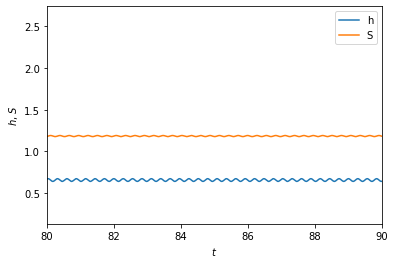

In [12]:
high_sim.plot_sim()
xlim([80,90])

Text(0.5, 0, 'Time (days)')

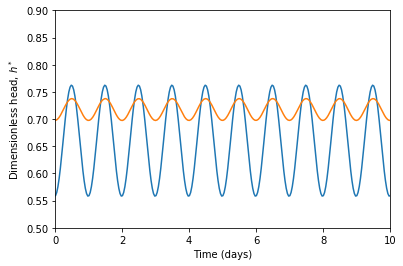

In [86]:
secs_per_day = 60*60*24
low_t = low_sim.sol.t*low_sim.tau_res/secs_per_day - 100
plot(low_t, low_sim.sol.y[0])
high_t = high_sim.sol.t*high_sim.tau_res/secs_per_day - 100
plot(high_t, high_sim.sol.y[0])

xlim([0,10])
ylim([0.5,0.9])
ylabel('Dimensionless head, $h^*$')
xlabel('Time (days)')


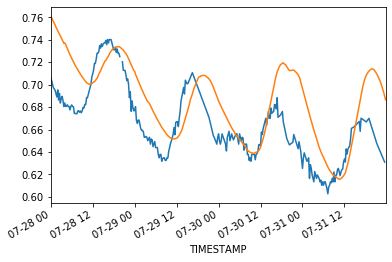

In [57]:
(jeme_str.stage['2017-07-28':'2017-7-31']/4.).plot()
jeme_mou.water_level_above_bed_fob['2017-07-28':'7-31-2017'].plot()


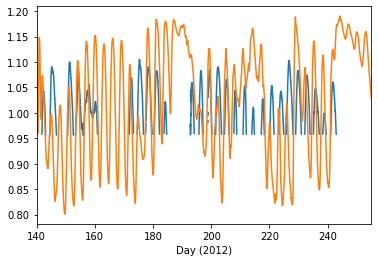

In [12]:
rho_i = 917.
rho_w = 1000.
h_fl_foxx = 620.*rho_i/rho_w
h_fl_mou3 = 564.*rho_i/rho_w
(foxx_mou['FOXX moulin (m)']/h_fl_foxx).plot()
#mou4_mou['Moulin 4 (m)'].dropna().plot()
(mou4_mou['Moulin 3 (m)'].dropna()/h_fl_mou3).plot()


(0.7, 0.85)

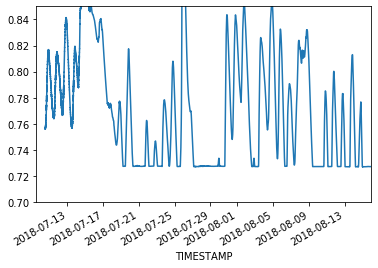

In [44]:
pira_mou.water_level_above_bed_fob[:'2018-08-15'].plot()
ylim([0.7,.85])

In [10]:
print('RADI',712*rho_i/rho_w * 0.03)
print('JEME',503*rho_i/rho_w * 0.1)
print('FOXX',600*rho_i/rho_w *0.3)

RADI 19.58712
JEME 46.1251
FOXX 165.06
